In [2]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import Planck18
import astropy.units as u


# Specify the path to your FITS file
fits_file_path = '../Data/QSO_cat_fuji_healpix_for_lyalpha.fits'

# Open the FITS file
with fits.open(fits_file_path) as hdul:
    # Assuming the table is in the first HDU (Header Data Unit)
    data = hdul[1].data

# Convert the FITS table to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                TARGETID         Z      ZERR  ZWARN SPECTYPE  \
0      39628295930645086  1.046974  0.000418      0      QSO   
1      39628295934836952  1.168470  0.000112      0      QSO   
2      39628273369485068  1.208420  0.000363      0      QSO   
3      39628279023406627  1.721946  0.000244      0      QSO   
4      39628279023407378  1.448871  0.000509      0      QSO   
...                  ...       ...       ...    ...      ...   
93881  39632956632859154  1.823278  0.000246      0      QSO   
93882  39632961653442836  2.397207  0.000381      0      QSO   
93883  39632956632860499  2.127409  0.000166      0      QSO   
93884  39632956632862141  3.402875  0.000150      0      QSO   
93885  39632951599694086  1.334060  0.000166      0      QSO   

       COADD_FIBERSTATUS   TARGET_RA  TARGET_DEC MORPHTYPE       EBV  ...  \
0                      0  200.271249   21.530566       PSF  0.026482  ...   
1                      0  200.400703   21.394566       PSF  0.023039  ...   


In [28]:
data.columns

ColDefs(
    name = 'TARGETID'; format = 'K'
    name = 'Z'; format = 'D'
    name = 'ZERR'; format = 'D'
    name = 'ZWARN'; format = 'K'
    name = 'SPECTYPE'; format = '6A'
    name = 'COADD_FIBERSTATUS'; format = 'J'
    name = 'TARGET_RA'; format = 'D'; unit = 'deg'
    name = 'TARGET_DEC'; format = 'D'; unit = 'deg'
    name = 'MORPHTYPE'; format = '3A'
    name = 'EBV'; format = 'E'; unit = 'mag'
    name = 'FLUX_G'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_R'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_Z'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_W1'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_W2'; format = 'E'; unit = 'nanomaggy'
    name = 'FLUX_IVAR_G'; format = 'E'; unit = 'nanomaggy^-2'
    name = 'FLUX_IVAR_R'; format = 'E'; unit = 'nanomaggy^-2'
    name = 'FLUX_IVAR_Z'; format = 'E'; unit = 'nanomaggy^-2'
    name = 'FLUX_IVAR_W1'; format = 'E'; unit = 'nanomaggy^-2'
    name = 'FLUX_IVAR_W2'; format = 'E'; unit = 'nanomaggy^-2'
    name 

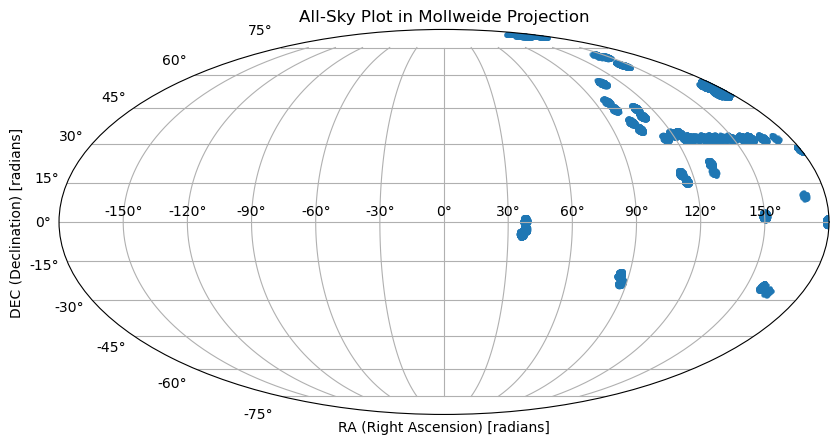

In [29]:
# Convert RA and DEC to radians
ra_rad = np.radians(df['TARGET_RA'])
dec_rad = np.radians(df['TARGET_DEC'])

# Convert RA and DEC to Cartesian coordinates
x = np.cos(dec_rad) * np.cos(ra_rad)
y = np.cos(dec_rad) * np.sin(ra_rad)

# Create an all-sky plot in Mollweide projection
plt.figure(figsize=(10, 5))
plt.subplot(111, projection='mollweide')
plt.scatter(ra_rad, dec_rad, s=5, alpha=0.6)

# Customize the plot
plt.title('All-Sky Plot in Mollweide Projection')
plt.grid(True)
plt.xlabel('RA (Right Ascension) [radians]')
plt.ylabel('DEC (Declination) [radians]')

# Show the plot
plt.show()

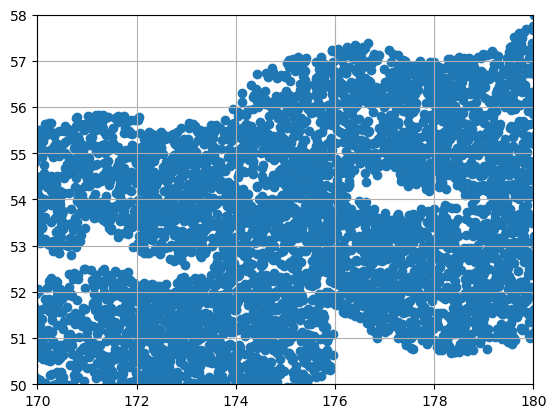

In [30]:
ra,dec=df['TARGET_RA'],df['TARGET_DEC']
plt.scatter(ra,dec)
plt.xlim(170,180)
plt.ylim(50,58)
plt.grid()

In [31]:
## Redshift Cuts
z_up=2.1
z_lo=0.8

df=df[(df['Z']>z_lo) & (df['Z']<z_up)]

In [32]:
### Define nano_maggy with f0=3631 Jy (AB magnitude system)

u.zero_point_flux(3631)
nmgy=1e-9 #*u.mgy


df['FLUX_G']=np.array(df['FLUX_G'])*nmgy

#Convert Flux_G to luminosity

df['lum_dist']=Planck18.luminosity_distance(df['Z'])
df['Lum_G']=((np.array(df['FLUX_G'])*3631*u.Jy*4*np.pi*(np.array(df['lum_dist'])*u.Mpc)**2).to(u.erg/u.s/u.Hz)*(233*u.nm).to(u.Hz,equivalencies=u.spectral()))


df=df[df['Lum_G']>0]

Text(0.5, 0, 'z')

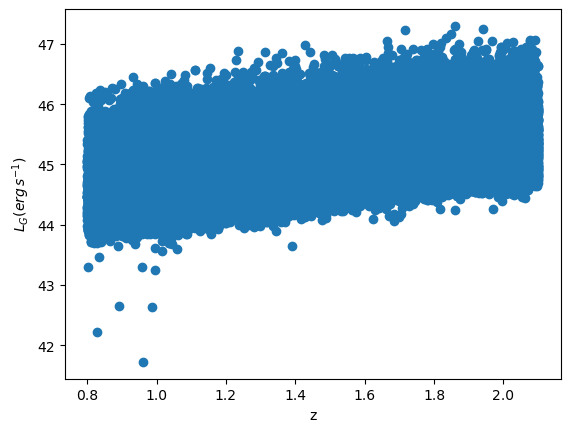

In [67]:
plt.scatter(df['Z'],np.log10(np.array(df['Lum_G'])))
plt.ylabel('$L_{G} (erg\\,s^{-1})$')
plt.xlabel('z')

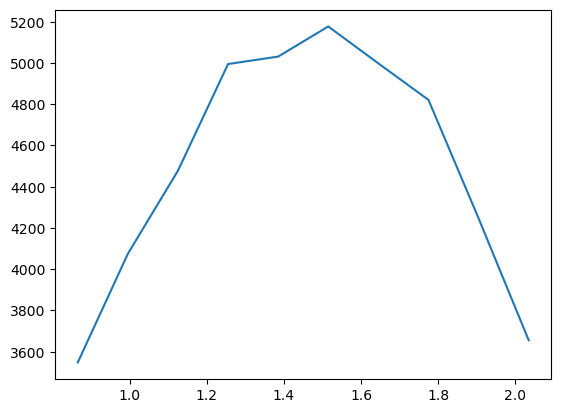

In [8]:
freq,bins=np.histogram(df['Z'])
bins=(bins[:-1]+bins[1:])/2

from astropy.cosmology import Planck18
vol=Planck18.comoving_volume(np.linspace(0.8,2.1,len(bins)))
vol=np.ones(len(vol))
plt.plot(bins,freq/vol)

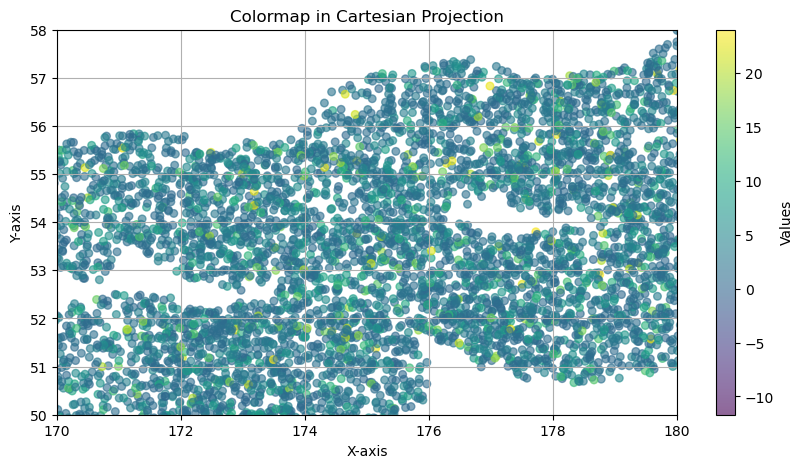

In [41]:
plt.figure(figsize=(10, 5))
sc = plt.scatter(ra[G<24], dec[G<24], c=G[G<24], s=30, alpha=0.6, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(sc, orientation='vertical')
cbar.set_label('Redshift')

# Customize the plot
plt.title('Colormap in Cartesian Projection')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(170,180)
plt.ylim(50,58)
plt.grid(True)

# Show the plot
plt.show()